http://fenics.readthedocs.io/projects/containers/en/latest/_downloads/jupyter-fenics-plotting-example.html

In [1]:
%matplotlib inline

/Users/WayNoxchi/Miniconda3/envs/FEM/lib/python3.6/site-packages/dolfin/common/plotting.py:55: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/WayNoxchi/Miniconda3/envs/FEM/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/WayNoxchi/Miniconda3/envs/FEM/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/WayNoxchi/Miniconda3/envs/FEM/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/WayNoxchi/Miniconda3/envs/FEM/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/WayNoxchi/Mini

error_L2  = 0.008235098073354806
error_max = 1.33226762955e-15


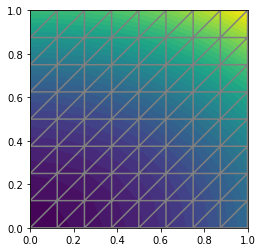

In [2]:
# %load ft01_poisson.py
# 2017-Nov-07 18:07
# WNixalo
# HPFEM01.1x - High Performace Finite Element Modeling - FEniCS tutorials
# https://fenicsproject.org/pub/tutorial/sphinx1/._ftut1003.html

# from dolfin import *
from fenics import *
# from dolfin import *
import numpy as np

parameters['plotting_backend'] == 'matplotlib'
# parameters['plotting_backend'] == 'x3dom'
# import matplotlib.pyplot as plt

# Create mesh and define the function space
mesh = UnitSquareMesh(8, 8)
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Plot solution and mesh
# plot(u, title='Finite Element Solution')
# plot(mesh, title='Finite Element Mesh')
plot(u)
plot(mesh)


# Save soltuion to file in VTK format
vtkfile = File('poisson/solution.pvd')
vtkfile << u

# Compute error in L2 norm
error_L2 = errornorm(u_D, u, 'L2')

# Compute maximum error at vertices
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u   = u.compute_vertex_values(mesh)
error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))

# Print errors
print('error_L2  =', error_L2)
print('error_max =', error_max)

# Hold plot
interactive()


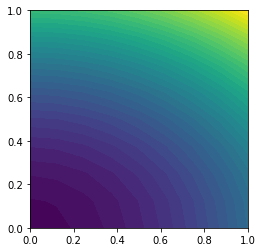

In [3]:
plot(u)

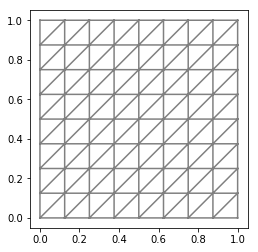

In [5]:
plot(mesh)

In [8]:
u = Function(V); u

In [9]:
solve(a == L, u, bc)

In [14]:
from IPython.display import HTML

In [19]:
HTML(X3DOM().html(u))

In [18]:
HTML(X3DOM().html(mesh))

In [20]:
interactive()